In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
sp500 = yf.Ticker("^GSPC")

In [3]:
sp500 = sp500.history(period="max")

In [4]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-16 00:00:00-05:00,5963.609863,5964.689941,5930.720215,5937.339844,4285810000,0.0,0.0
2025-01-17 00:00:00-05:00,5995.399902,6014.959961,5978.439941,5996.660156,4366830000,0.0,0.0
2025-01-21 00:00:00-05:00,6014.120117,6051.509766,6006.879883,6049.240234,4702920000,0.0,0.0


In [5]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2025-01-08 00:00:00-05:00', '2025-01-10 00:00:00-05:00',
               '2025-01-13 00:00:00-05:00', '2025-01-14 00:00:00-05:00',
               '2025-01-15 00:00:00-05:00', '2025-01-16 00:00:00-05:00',
               '2025-01-17 00:00:00-05:00', '2025-01-21 00:00:00-05:00',
               '2025-01-22 00:00:00-05:00', '2025-01-23 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24381, freq=None)

<Axes: xlabel='Date'>

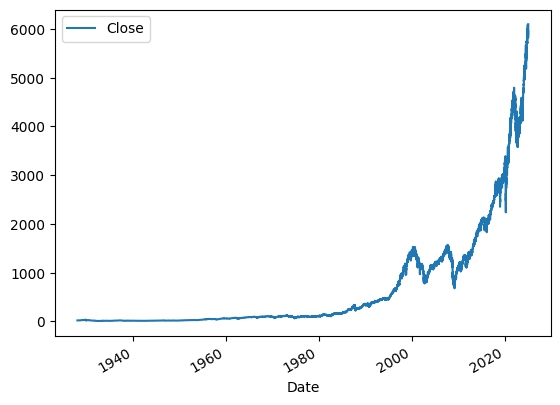

In [6]:
sp500.plot.line(y="Close", use_index = True)

In [7]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [21]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [10]:
sp500 = sp500.loc["1990-01-01":].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2025-01-16 00:00:00-05:00,5963.609863,5964.689941,5930.720215,5937.339844,4285810000,5996.660156,1
2025-01-17 00:00:00-05:00,5995.399902,6014.959961,5978.439941,5996.660156,4366830000,6049.240234,1
2025-01-21 00:00:00-05:00,6014.120117,6051.509766,6006.879883,6049.240234,4702920000,6086.370117,1


In [11]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [12]:
from sklearn.metrics import precision_score
preds = model.predict(test[predictors])
preds = pd.Series(preds, index = test.index)
precision_score(test["Target"], preds)

0.7

<Axes: xlabel='Date'>

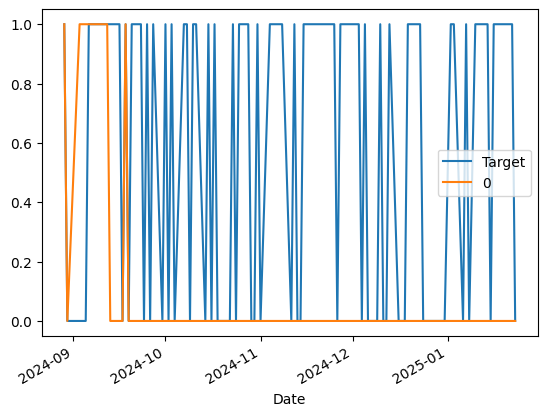

In [13]:
combined = pd.concat([test["Target"],preds],axis=1)
combined.plot()

In [14]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds=pd.Series(preds, index= test.index, name = "Predictions")
    combined = pd.concat([test["Target"],preds],axis=1)
    return combined
              

In [15]:
def backtest(data, model, predictors, start = 2500, step = 250): #trading year = 250 days, train with 10+1+.. years
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions) #given year
    return pd.concat(all_predictions) # all pred together
        

In [16]:
predictions = backtest(sp500, model, predictors)
predictions["Predictions"].value_counts() # counts how many times each type of prediction is made

Predictions
0    3696
1    2635
Name: count, dtype: int64

In [17]:
precision_score(predictions["Target"], predictions["Predictions"]) 

0.5286527514231499

In [20]:
predictions["Target"].value_counts() / predictions.shape[0] # % of days market went up = val count/rows

Target
1    0.53625
0    0.46375
Name: count, dtype: float64

In [26]:
horizons = [2,5,60,250,1000] 

new_predictors=[]

for i in horizons:
    rolling_avg= sp500.rolling(i).mean()

    ratio_col = f"Close_Ratio_{i}"
    sp500[ratio_col] = sp500 ["Close"] / rolling_avg["Close"] # close of today by avg in last 2,5.. days
    
    trend = f"Trend_{i}"
    sp500[trend]= sp500.shift(1).rolling(i).sum()["Target"]

    new_predictors += [ratio_col, trend]

In [28]:
sp500 = sp500.dropna()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-15 00:00:00-05:00,5905.209961,5960.609863,5905.209961,5949.910156,4544570000,5937.339844,0,1.009073,2.0,1.012774,4.0,1.002631,34.0,1.086719,145.0,1.309280,528.0
2025-01-16 00:00:00-05:00,5963.609863,5964.689941,5930.720215,5937.339844,4285810000,5996.660156,1,0.998943,1.0,1.009978,3.0,1.000308,33.0,1.083508,144.0,1.305916,527.0
2025-01-17 00:00:00-05:00,5995.399902,6014.959961,5978.439941,5996.660156,4366830000,6049.240234,1,1.004971,1.0,1.014216,4.0,1.009898,34.0,1.093410,144.0,1.318340,528.0


In [ ]:
model = RandomForestClassifier(n_estimators = 200, min_samples_split = 50, random_state=1)

In [38]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1] # return 2nd coloumn (probability)
    preds[preds >= .6] =1 # threshold to 60%, high chances price will go up
    preds[preds < .6] =0
    preds=pd.Series(preds, index= test.index, name = "Predictions")
    combined = pd.concat([test["Target"],preds],axis=1)
    return combined

In [39]:
predictions = backtest(sp500, model, new_predictors)

In [40]:
predictions["Predictions"].value_counts()

Predictions
0.0    4621
1.0     709
Name: count, dtype: int64